# Soal Ujian Module 2 Purwadhika

### 1. Import the libraries (pandas,numpy, matplotlib.pyplot, seaborn, math)

#### Use random.seed(101)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

### 2. Load Titanic Dataset from Seaborn and show the .head() of the dataset

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 3. Show the info of the dataframe using .info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### 4. Describe the dataframe using .describe()

In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 5. Make Table like this to describe the dataframe

#### Columns Explanations :
 - __dataFeatures__ = column name
 - __dataType__ = data type of that column
 - __null__ = how many null data in that column/series
 - __nullPct__ = null percentage of total data in that column
 - __unique__ = how many unique data
 - __uniqueSample__ = get some unique sample from each column

#### hint : search .sample(), .drop_duplicates(), .values, .isna(), dtype

In [5]:
features = []
for i in df.columns:
    features.append(i)

In [6]:
typedata = []
for i in range(15) :
    typedata.append(df.dtypes[i])

In [7]:
null = []
for i in df.columns:
    null.append(df[i].isna().sum())

In [8]:
nullpct = []
for i in null:
    nullpct.append((i/800) * 100)

In [9]:
unique = []
for i in df.columns:
    unique.append(len(df[i].drop_duplicates()))
unique

[2, 3, 2, 89, 7, 7, 248, 4, 3, 3, 2, 8, 4, 2, 2]

In [10]:
sample = []
for i in df.columns:
    sample.append(df[i].sample(n=2 , replace=True).values)


In [11]:
d= {'dataFeatures' : features , 'dataType' : typedata , 'null' : null , 'nullPct' : nullpct , 'unique' : unique , 'uniqueSample' : sample}
dfDescribe = pd.DataFrame(data =d)
dfDescribe

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,survived,int64,0,0.000,2,"[0, 1]"
1,pclass,int64,0,0.000,3,"[3, 3]"
2,sex,object,0,0.000,2,"[male, male]"
3,age,float64,177,22.125,89,"[39.0, 50.0]"
4,sibsp,int64,0,0.000,7,"[0, 0]"
5,parch,int64,0,0.000,7,"[0, 0]"
6,fare,float64,0,0.000,248,"[10.5, 9.2167]"
7,embarked,object,2,0.250,4,"[S, S]"
8,class,category,0,0.000,3,"[Third, Second] Categories (3, object): [First..."
9,who,object,0,0.000,3,"[man, man]"


### 6. Groupby

_Group By Sex (Mean)_

In [12]:
df.groupby('sex').mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


_Group By Sex (standard deviation)_

In [13]:
df.groupby('sex').std()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.438211,0.85729,14.110146,1.156520,1.022846,57.997698,0.000000,0.490939
male,0.391775,0.81358,14.678201,1.061811,0.612294,43.138263,0.254225,0.453081


_Group By Sex (Minimum value)_

In [14]:
df.groupby('sex').min()

,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,alone
sex,,,,,,,,,,
female,0,1,0.75,0,0,6.75,child,False,no,False
male,0,1,0.42,0,0,0.00,child,False,no,False


_Group By Sex (Maximum value)_

In [15]:
df.groupby('sex').max()

,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,alone
sex,,,,,,,,,,
female,1,3,63.0,8,6,512.3292,woman,False,yes,True
male,1,3,80.0,8,5,512.3292,man,True,yes,True


_Group By Sex (Count)_

In [16]:
df.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


_Group By Sex (Describe Transpose)_

In [17]:
df.groupby('sex').describe().transpose()

sex                 female        male
age      count  261.000000  453.000000
         mean    27.915709   30.726645
         std     14.110146   14.678201
         min      0.750000    0.420000
         25%     18.000000   21.000000
         50%     27.000000   29.000000
         75%     37.000000   39.000000
         max     63.000000   80.000000
fare     count  314.000000  577.000000
         mean    44.479818   25.523893
         std     57.997698   43.138263
         min      6.750000    0.000000
         25%     12.071875    7.895800
         50%     23.000000   10.500000
         75%     55.000000   26.550000
         max    512.329200  512.329200
parch    count  314.000000  577.000000
         mean     0.649682    0.235702
         std      1.022846    0.612294
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      6.000000    5.000000
pclass   count  314.000000  577.000000
         mean     2.159236    2.389948
         std      0.857290    0.813580
         min      1.000000    1.000000
         25%      1.000000    2.000000
         50%      2.000000    3.000000
         75%      3.000000    3.000000
         max      3.000000    3.000000
sibsp    count  314.000000  577.000000
         mean     0.694268    0.429809
         std      1.156520    1.061811
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      8.000000    8.000000
survived count  314.000000  577.000000
         mean     0.742038    0.188908
         std      0.438211    0.391775
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      1.000000    0.000000
         max      1.000000    1.000000

### 7. Filter

#### Berapa banyak jumlah datanya kalau datanya cuma class = First dan class = Third ?

#### Berapa mean umur pria dari campuran class First dan Third?

#### lalu munculkan 5 data teratas dari filter tersebut dan cuma kolom sex dan age aja yang muncul

In [18]:
print(len(df[(df['class'] == 'First') | (df['class'] == 'Third')]))
print(df[((df['class'] == 'First') | (df['class'] == 'Third')) & (df['sex'] == 'male')]['age'].mean())
print(df[(df['class'] == 'First') | (df['class'] == 'Third')].head().drop(['survived' , 'pclass','sibsp' , 'parch', 'fare','embarked','class','who','adult_male','deck','embark_town','alive','alone'] , axis=1))

707
30.72271186440678
      sex   age
0    male  22.0
1  female  38.0
2  female  26.0
3  female  35.0
4    male  35.0


#### Berapa total fare dari penumpang yang second class dan sendirian?

In [19]:
df[(df['class'] == 'Second') & (df['alone'] == True)]['fare'].sum()

1462.875

### 8. Missing Values
#### Berapa banyak NaN age data dan mean dari setiap who?
#### Isi data NaN dari kolom age dengan mean dari umur tergantung whonya dia apa (child/woman/man)
#### Kemudian print banyak NaN age data dan mean umur setiap who lagi.

In [20]:
manNan = df[df['who'] == 'man']['age'].isna().sum()
manMean = math.ceil(df[df['who'] == 'man']['age'].mean())
womenNan = df[df['who'] == 'woman']['age'].isna().sum()
womenMean = math.ceil(df[df['who'] == 'woman']['age'].mean())
childNan = df[df['who'] == 'child']['age'].isna().sum()
childMean = math.ceil(df[df['who'] == 'child']['age'].mean())
print(manNan)
print(manMean)
print(womenNan)
print(womenMean)
print(childNan)
print(childMean)
print(df['age'].isna().head())

124
34
53
32
0
7
0    False
1    False
2    False
3    False
4    False
Name: age, dtype: bool


In [21]:
def fillAge(cols):
    age = cols['age']
    who = cols['who']
    if(age is np.nan):
        if(who == 'man'):
            return math.ceil(manMean)
        elif(who == 'woman'):
            return math.ceil(womenMean)
        elif(who == 'child'):
            return math.ceil(childMean)
    return age


In [22]:
df['age'] = df[['age','who']].apply(fillAge , axis=1)

In [23]:
# KENAPA nan==np.nan HASILNYA FALSEE????? 

In [24]:
df['age'][17] == np.nan

False

#### Isi NaN embarked dan embark_town dan deck dengan modus masing2 (print modus masing2 juga)

#### Last Print the dataframe info to check if there is still NaN values

### 9. Adding New Features/Columns/Variables

#### Buat DataFrame baru dengan column2 sebagai berikut
 - __id__ = id table ini (PK)
 - __mean_fare__ = Mean Fare
 - __std_fare__ = Std Fare
 - __batas_min_fare__ = Mean Fare - (3 x Std Fare)
 - __batas_max_fare__ = Mean Fare + (3 x Std Fare)
 
#### Dan data2nya ada 3 (fare setiap class yaitu first, second, and third class)

In [25]:
mean = df.groupby('class').mean()['fare']
std = df.groupby('class').std()['fare']
minfare = mean - (3*std)
maxfare = mean + (3*std)
df.groupby('class')['fare'].max()

class
First     512.3292
Second     73.5000
Third      69.5500
Name: fare, dtype: float64

In [26]:
d = {'id' : [1,2,3] , 'mean_fare' : mean, 'std_fare' : std, 'batas_min_fare' : minfare, 'batas_max_fare' : maxfare }
newFeature = pd.DataFrame(data= d)
newFeature

,id,mean_fare,std_fare,batas_min_fare,batas_max_fare
class,,,,,
First,1,84.154687,78.380373,-150.986430,319.295805
Second,2,20.662183,13.417399,-19.590013,60.914379
Third,3,13.675550,11.778142,-21.658875,49.009975


In [27]:
print(len(df[(df['fare'] > maxfare.values[0]) | (df['fare'] < minfare.values[0])])/216*100)
print(len(df[(df['fare'] > maxfare.values[1]) | (df['fare'] < minfare.values[1])])/184*100)
print(len(df[(df['fare'] > maxfare.values[2]) | (df['fare'] < minfare.values[2])])/491*100)

1.3888888888888888
66.30434782608695
33.401221995926676


#### Print outlier % of each class

#### Tambahkan column outliercalcId (FK) di dfTitanic

In [34]:
new = df['class'].replace(['Third','First','Second'] , [3,1,2])

In [37]:
df['outliercalcid']=new
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,outliercalcid
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3


#### Tambahkan column outlier (1 for yes and 0 for no)

In [39]:
def yesno(cols) :
    classs = cols['class']
    fare = cols['fare']
    if(classs == 'First'):
        if(fare > maxfare.values[0]):
            return 1
        return 0
    elif(classs == 'Second'):
        if(fare > maxfare.values[1]):
            return 1
        return 0
    elif(classs == 'Third'):
        if(fare > maxfare.values[2]):
            return 1
        return 0

In [43]:
df['outlier'] =  df[['class','fare']].apply(yesno , axis=1)
len(df[df['outlier'] == 1])

24

### 10. Export both dataFrames to csv (Titanic.csv, TitanicOutCalc.csv)

In [45]:
df.to_csv('titanic.csv' , index = False)
newFeature.to_csv('TitanicOutCalc.csv' , index=False)

### 11. Buatlah plot2 dibawah menggunakan seaborn

#### a. Heatmap dari correlation dfTitanic (color=coolwarm, plt.figure(figsize=(10,5))

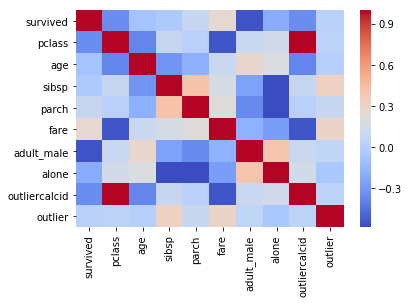

In [47]:
sns.heatmap(df.corr(),cmap='coolwarm')

#### b. buatlah countplot seperti dibawah (style=whitegrid, palette=rainbow)

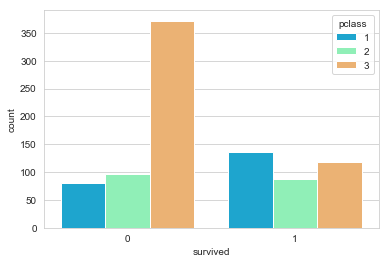

In [51]:
sns.set_style("whitegrid")
sns.countplot(df['survived'] , hue=df['pclass'], palette='rainbow')

#### c. buatlah histogram age dibawah (color=darkred,bins=30)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

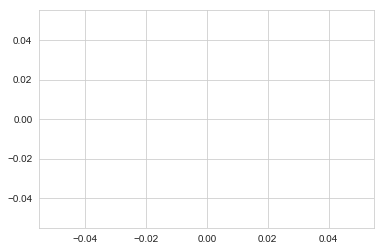

In [53]:
sns.distplot(df['age'],kde=False)

# Goodluck Guys!! Salam Bertasbih!